## **Importación de librerías**

In [1]:
# Tratamiento de datos.
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.impute import SimpleImputer as sp 

# Visualizaciones.
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga de datos `dataset_estudiantes.csv`**

Se importa el fichero `dataset_estudiantes` en un DataFrame utilizando `read_csv`.

In [2]:
df = pd.read_csv("../Machine-Learning-/data/1.raw/dataset_estudiantes.csv")

#### **Columnas del dataset**

- **horas_estudio_semanal**: Número de horas de estudio a la semana.

- **nota_anterior**: Nota que obtuvo el alumno en la convocatoria anterior.

- **tasa_asistencia**: Tasa de asistencia a clase en porcentaje.

- **horas_sueno**: Promedio de horas que duerme el alumno al día.

- **edad**: Edad del alumno.

- **nivel_dificultad**: Dificultad del alumno para el estudio.

- **tiene_tutor**: Indica si el alumno tiene tutor o no.

- **horario_estudio_preferido**: Horario de estudio preferido por el alumno.

- **estilo_aprendizaje**: Forma de estudio que emplea el alumno.

#### **Variables objetivo**

- Para regresión: **nota_final** (variable continua entre 0 y 100)

- Para clasificación: **aprobado** (variable binaria: 1 si la nota es ≥ 60, y 0 en caso contrario)

## **Análisis preliminar**

Se muestran registros iniciales y finales para verificar que la carga se ha realizado correctamente.

In [3]:
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [4]:
df.tail()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
995,12.821334,79.453807,87.058862,5.581576,22,Medio,Sí,Noche,Lectura/Escritura,78.9,1
996,15.200448,87.246126,90.160085,6.063783,24,Medio,Sí,Mañana,Auditivo,73.6,1
997,8.158924,53.324469,61.525951,6.562950,29,Fácil,No,Noche,Lectura/Escritura,65.0,1
998,18.582076,88.309605,96.326078,6.691088,21,Medio,Sí,Noche,Kinestésico,73.8,1
999,4.968947,64.234379,100.000000,5.200351,22,Fácil,No,Noche,Visual,61.3,1


#### **Se comprueba la dimensión del dataset**

In [5]:
print(f"El número de filas es: {df.shape[0]}")
print(f"El número de columnas es: {df.shape[1]}")

El número de filas es: 1000
El número de columnas es: 11


#### **Se analizan los tipos de datos asociados a cada variable del dataset**

In [11]:
df.dtypes

horas_estudio_semanal        float64
nota_anterior                float64
tasa_asistencia              float64
horas_sueno                  float64
edad                           int64
nivel_dificultad              object
tiene_tutor                   object
horario_estudio_preferido     object
estilo_aprendizaje            object
nota_final                   float64
aprobado                       int64
dtype: object

Se confirma que las variables están definidas de forma coherente con la información que contienen.

## **Calidad de los datos**

#### **Se comprueba si existen filas duplicadas en el dataset**

In [13]:
df.duplicated().sum()

np.int64(0)

Se comprueba la inexistencia de registros duplicados en el conjunto de datos.

#### **Se calcula el total de valores nulos en el conjunto de datos.**

In [14]:
nulos = df.isnull().sum().sort_values(ascending=False)
pct_nulos = (df.isnull().mean() * 100).sort_values(ascending=False)
print(nulos[nulos > 0], "\n")
print(pct_nulos[pct_nulos > 0])

horas_sueno                  150
horario_estudio_preferido    100
estilo_aprendizaje            50
dtype: int64 

horas_sueno                  15.0
horario_estudio_preferido    10.0
estilo_aprendizaje            5.0
dtype: float64


Se observa que solo tres variables presentan valores nulos, destacando `horas_sueno` como la variable que presenta mayor proporción de nulos.

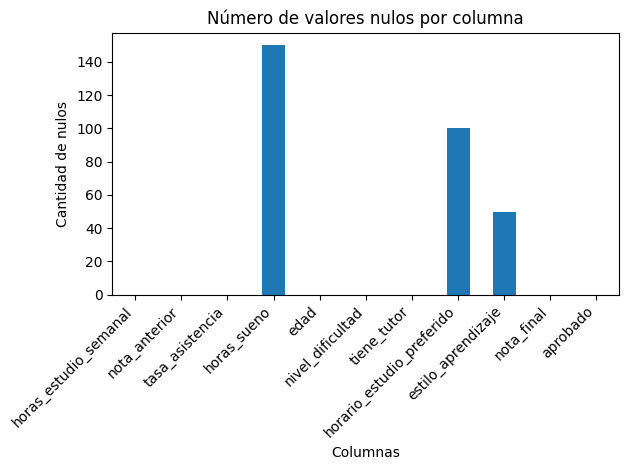

In [15]:
df.isnull().sum().plot(kind='bar')
plt.title("Número de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Se genera un gráfico de barras con el recuento de valores nulos por variable, de esta forma se facilita una lectura rápida y clara.

## **Exploración y análisis de los tipos de variables**

#### **Variables numéricas**

In [16]:
columns_num = df.select_dtypes(include='number').columns
columns_num

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

In [17]:
df.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


**Observaciones:**

`horas_estudio_semanal`: presenta una dispersión moderada y un rango amplio que va de 1 a 25 horas, lo que sugiere diferencias claras en el tiempo de dedicación entre estudiantes. La mediana 10.00 cercana a la media 10.07 indica una distribución relativamente equilibrada, aunque la desviación típica 4,85 indica diferencias notables en la dedicación al estudio.

`nota_anterior`: las calificaciones previas se concentran alrededor de un valor central cercano a 70 puntos, con variabilidad apreciable. El amplio rango de valores, que va de 30 a 100, pone de manifiesto la coexistencia de rendimientos bajos y altos, lo que refleja un grupo claramente heterogéneo, aunque la mitad de los estudiantes se concentra aproximadamente entre 60 y 80 puntos.

`tasa_asistencia`: los niveles de asistencia en general, son elevados, con una media cercana al 74 % y una mediana del 75 %. No obstante, la desviación estándar de 18,20 evidencia una variabilidad considerable entre estudiantes. A pesar de ello, los percentiles superiores muestran que una proporción significativa mantiene una asistencia alta, situándose el 75 % del alumnado por encima de aproximadamente el 61 % de asisitencia.

`horas_sueno`: la media se sitúa en torno a 7 horas diarias y la variabilidad es baja, con una desviación estándar de 1,44. La mayoría de los valores se concentra entre 6 y 8 horas, lo que indica hábitos de sueño bastante estables y consistentes en la mayor parte de los estudiantes.

`edad`: la muestra se concentra en edades cercanas a los veintitantos, con una media de 23,5 años y una mediana de 24. El rango va de 18 a 29 años y la desviación estándar de 3,48 indica una variabilidad moderada, lo que refleja un grupo mayoritariamente joven y relativamente homogéneo en cuanto a edad.

`nota_final`: el rendimiento final se concentra en torno a un valor central cercano a 71 puntos, con una media de 71,44 y una mediana prácticamente igual. La variabilidad es moderada y la mayoría de las calificaciones se sitúa en un intervalo intermedio-alto, aproximadamente entre 65 y 78 puntos, aunque el rango completo alcanza hasta 100.

`aprobado`: al tratarse de una variable binaria, su media de 0,90 indica que aproximadamente el 90 % de los estudiantes ha superado la asignatura, lo que refleja que la mayoría del conjunto cumple el criterio de aprobación y presenta un elevado nivel de éxito académico.

In [24]:
for col in columns_num:
    print(f'La columna {col} tiene un total de {df[col].nunique()} valores unicos')
    display(df[col].value_counts().head(10).sort_values(ascending=False))

La columna horas_estudio_semanal tiene un total de 964 valores unicos


horas_estudio_semanal
1.000000     36
25.000000     2
7.439697      1
14.688989     1
8.957476      1
6.407690      1
13.415889     1
16.237527     1
4.323579      1
7.928666      1
Name: count, dtype: int64

La columna nota_anterior tiene un total de 975 valores unicos


nota_anterior
100.000000    23
30.000000      4
81.878257      1
66.254179      1
73.089118      1
91.067997      1
96.979939      1
62.103747      1
71.829926      1
61.580094      1
Name: count, dtype: int64

La columna tasa_asistencia tiene un total de 893 valores unicos


tasa_asistencia
100.000000    106
20.000000       3
74.623607       1
82.849841       1
54.539935       1
79.787603       1
71.799792       1
51.411965       1
60.824963       1
64.701534       1
Name: count, dtype: int64

La columna horas_sueno tiene un total de 810 valores unicos


horas_sueno
4.000000     22
10.000000    20
4.753005      1
5.200351      1
6.675694      1
4.616844      1
7.755246      1
8.592826      1
6.671840      1
8.509316      1
Name: count, dtype: int64

La columna edad tiene un total de 12 valores unicos


edad
18    94
27    91
26    89
23    89
24    87
21    87
28    86
19    83
25    79
29    79
Name: count, dtype: int64

La columna nota_final tiene un total de 364 valores unicos


nota_final
74.6    10
72.8    10
66.0     8
69.4     8
72.0     8
61.3     8
72.7     7
64.4     7
73.0     7
69.8     7
Name: count, dtype: int64

La columna aprobado tiene un total de 2 valores unicos


aprobado
1    898
0    102
Name: count, dtype: int64

**Observaciones:**

`horas_estudio_semanal`: presenta una elevada diversidad de valores, lo que indica diferencias notables en el tiempo dedicado al estudio. Entre los valores más frecuentes aparecen distintas cantidades de horas, lo que sugiere que no existe un único patrón dominante de dedicación semanal.

`nota_anterior`: muestra una amplia variedad de calificaciones. Los valores más repetidos se sitúan en rangos intermedios, mientras que también aparecen valores extremos, lo que confirma la coexistencia de estudiantes con rendimientos bajos y altos.

`tasa_asistencia`: el valor más frecuente corresponde al 100 % de asistencia, lo que indica que un número relevante de estudiantes asiste a todas las clases. No obstante, también se observan otros porcentajes con menor frecuencia, reflejando distintos niveles de compromiso.

`horas_sueno`: los valores que se repiten con mayor frecuencia se sitúan en los extremos del rango, destacando 4 y 10 horas como los más comunes. Esto sugiere la existencia de dos patrones de descanso bastante diferenciados entre los estudiantes.

`edad`: los valores más frecuentes se concentran en edades cercanas a los veintitantos, confirmando que la mayor parte del alumnado se encuentra en un rango de edad reducido y relativamente homogéneo.

`nota_final`: presenta una amplia dispersión de valores, aunque las calificaciones que más se repiten se sitúan en niveles intermedios, lo que indica un rendimiento final mayoritariamente medio.

`aprobado`: al ser una variable binaria, solo toma dos valores posibles. El valor correspondiente al aprobado es claramente dominante en frecuencia, con casi un 90% de los resultados, lo que refuerza la idea de que la mayoría del alumnado supera la asignatura.

#### **Variables categóricas**

In [26]:
columns_cate = df.select_dtypes(include= ['category', 'object']).columns
columns_cate

Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')

In [28]:
df.describe( include=['category', 'object']).T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


**Observaciones:**

`nivel_dificultad`: contiene 3 categorías. La categoría más frecuente es “Medio” con 504 apariciones, por lo que predomina un nivel de dificultad intermedio.

`tiene_tutor`: presenta 2 categorías. La opción más común es “No” con 597 casos, lo que indica que la mayoría de estudiantes no cuenta con tutor, mostrando una diferencia moderada entre ambas categorías.

`horario_estudio_preferido`: incluye 3 categorías sobre 900 registros válidos. La categoría predominante es “Noche” con 344 observaciones, sugiriendo una preferencia mayoritaria por estudiar en ese horario.

`estilo_aprendizaje`: tiene 4 categorías en 950 registros válidos. El estilo más frecuente es “Visual” con 363 apariciones, indicando que es la modalidad de aprendizaje predominante en la muestra.

In [33]:
for col in columns_cate:
    
    print(f'La columna {col} tiene un total de {df[col].nunique()} valores unicos')

    display(df[col].value_counts())

La columna nivel_dificultad tiene un total de 3 valores unicos


nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64

La columna tiene_tutor tiene un total de 2 valores unicos


tiene_tutor
No    597
Sí    403
Name: count, dtype: int64

La columna horario_estudio_preferido tiene un total de 3 valores unicos


horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64

La columna estilo_aprendizaje tiene un total de 4 valores unicos


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64

**Observaciones:**

`nivel_dificultad`: presenta tres categorías. Predomina el nivel Medio con 504 registros, seguido de Fácil con 313 y Difícil con 183, lo que indica que la mayoría de los estudiantes percibe la dificultad como intermedia.

`tiene_tutor`: cuenta con dos categorías. La opción No es la más frecuente con 597 casos, frente a Sí con 403, lo que muestra que la mayoría no dispone de tutor, aunque ambas categorías están razonablemente representadas.

`horario_estudio_preferido`: incluye tres categorías con una distribución bastante equilibrada entre Noche con 344 y Tarde con 337, mientras que Mañana es menos frecuente con 219 casos. Esto sugiere una ligera preferencia por estudiar en horarios no matutinos.

`estilo_aprendizaje`: presenta cuatro categorías. El estilo Visual es el más común con 363 registros, seguido de Auditivo  con 254, Kinestésico con 178 y Lectura/Escritura con 155, lo que indica una diversidad de estilos de aprendizaje, con predominio del visual.
